## Imports

In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import config
np.random.seed(config.SEED)

# read data
df = pd.read_csv(config.DATA_CSV)
# create index. {contest}{problem} format
df.index = df["contest"].astype(str)+df["problem_name"]
# keep only problem_statement, tags
df = df[["problem_statement","problem_tags"]]
df.columns = ["problem_statement","tags"]

print(df.info())
df.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 8343 entries, 325A to 1271F
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   problem_statement  8336 non-null   object
 1   tags               8279 non-null   object
dtypes: object(2)
memory usage: 195.5+ KB
None


,problem_statement,tags
1271B,There are $$$n$$$ blocks arranged in a row and...,"greedy,math,*1300"
1271C,The map of the capital of Berland can be viewe...,"bruteforce,geometry,greedy,implementation,*1300"
1271D,"You play a strategic video game (yeah, we ran ...","datastructures,dp,greedy,implementation,sortin..."
1271E,"At first, let's define function $$$f(x)$$$ as ...","binarysearch,combinatorics,dp,math,*2100"
1271F,Recently a lot of students were enrolled in Be...,"bruteforce,*2700"


## problem_statement

In [2]:
df["problem_statement"].describe()

count                                                  8336
unique                                                 6818
top       The Smart Beaver from ABBYY came up with anoth...
freq                                                     20
Name: problem_statement, dtype: object

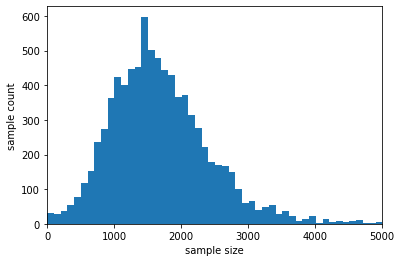

In [3]:
# historgram on text data size
samples = df["problem_statement"].values
plt.hist([len(str(s)) for s in samples], 100)
plt.xlim(0,5000)
plt.xlabel("sample size")
plt.ylabel("sample count")
plt.show()

텍스트 길이가 1000~2000 사이인 데이터가 제일 많은듯.

0~3000만 살리고 나머지는 자를까...

In [4]:
from preprocess import preprocess_text

text = df.loc["100A","problem_statement"]
print(preprocess_text(text))
print(df.loc["100A","tags"])

df["problem_statement"] = \
    df["problem_statement"].apply(lambda x:preprocess_text(str(x)))

df["problem_statement"]

n1soroush contest input number onli allow carpet fine yes consist three 100th side cover singl length write area completelyth want bought squar site integ complet soroush sorush befor favorit rotat celebr room persian put
*specialproblem,implementation,*1100


325A     given least singl top one touch determin equal...
325B     specifi play i64d number organ format possibl ...
325C     given number least end possibl unlimit across ...
325D     given number allow rout locat leftmost possibl...
325E     piegirl 1input number instead find twice inevi...
                               ...                        
1271B    bwwwwbbb number string find examplein possibl ...
1271C    coincid build place number find school least e...
1271D    play portal listedit number action mean least ...
1271E    number find least end question get exampl begi...
1271F    place given number mean possibl dont scienc co...
Name: problem_statement, Length: 8343, dtype: object

## Tags

In [5]:
df["tags"].describe()

count                    8279
unique                   4786
top       implementation,*800
freq                      109
Name: tags, dtype: object

In [6]:
from preprocess import clean_tags_column
df["tags"]=df["tags"].apply(clean_tags_column)
df = df[df.tags.str.len()>=1]
df.tail()

,problem_statement,tags
1271B,bwwwwbbb number string find examplein possibl ...,"[greedy, math]"
1271C,coincid build place number find school least e...,"[bruteforce, geometry, greedy, implementation]"
1271D,play portal listedit number action mean least ...,"[datastructures, dp, greedy, implementation, s..."
1271E,number find least end question get exampl begi...,"[binarysearch, combinatorics, dp, math]"
1271F,place given number mean possibl dont scienc co...,[bruteforce]


implementation            2221
math                      2028
greedy                    1950
dp                        1673
datastructures            1290
constructivealgorithms    1181
bruteforce                1173
graphs                     901
binarysearch               786
sortings                   759
Name: tags, dtype: int64


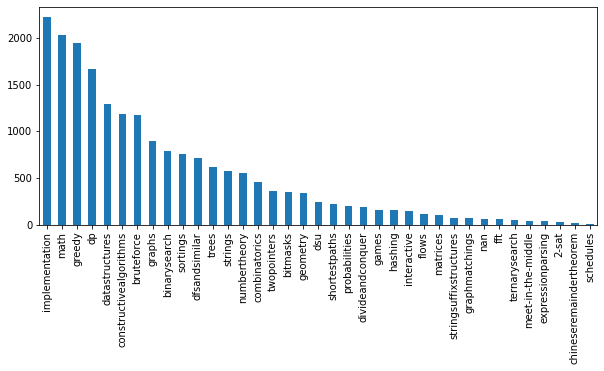

In [7]:
# tag stats
# https://stackoverflow.com/a/71887174/3413574
tag_stats = df["tags"].explode().value_counts()
tag_stats.plot(kind="bar", figsize=(10,4))
print(tag_stats.head(10))

In [8]:
df.tail()

,problem_statement,tags
1271B,bwwwwbbb number string find examplein possibl ...,"[greedy, math]"
1271C,coincid build place number find school least e...,"[bruteforce, geometry, greedy, implementation]"
1271D,play portal listedit number action mean least ...,"[datastructures, dp, greedy, implementation, s..."
1271E,number find least end question get exampl begi...,"[binarysearch, combinatorics, dp, math]"
1271F,place given number mean possibl dont scienc co...,[bruteforce]


## 특정 태그들에 대해서만 EDA

In [9]:
new_tags = ["math", "datastructures", "graphs",
            "greedy", "dp", "strings", "geometry","constructivealgorithms"]

new_df = pd.DataFrame(index=df.index,
                columns=["problem_statement"]+new_tags)

for idx in new_df.index:
    new_df.loc[idx,"problem_statement"] = df.loc[idx,"problem_statement"]
    for tag in new_tags:
        if tag in df.loc[idx,"tags"]:
            new_df.loc[idx,tag] = 1
        else: 
            new_df.loc[idx,tag] = 0
new_df.tail()


,problem_statement,math,datastructures,graphs,greedy,dp,strings,geometry,constructivealgorithms
1271B,bwwwwbbb number string find examplein possibl ...,1,0,0,1,0,0,0,0
1271C,coincid build place number find school least e...,0,0,0,1,0,0,1,0
1271D,play portal listedit number action mean least ...,0,1,0,1,1,0,0,0
1271E,number find least end question get exampl begi...,1,0,0,0,1,0,0,0
1271F,place given number mean possibl dont scienc co...,0,0,0,0,0,0,0,0


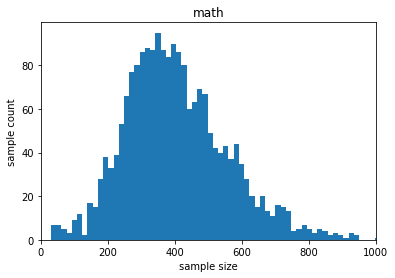

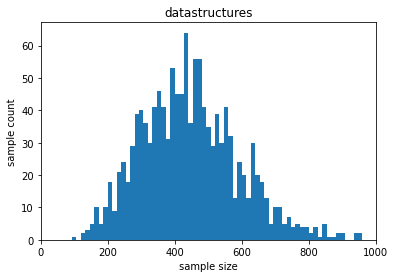

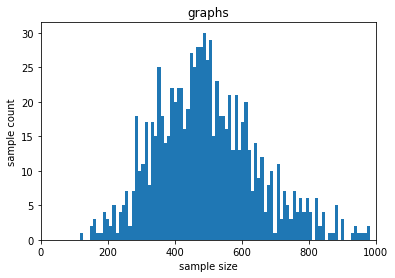

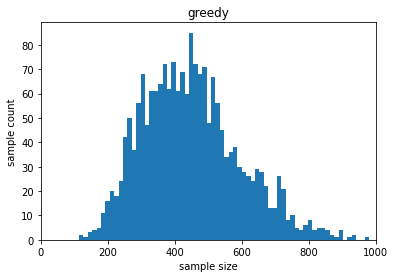

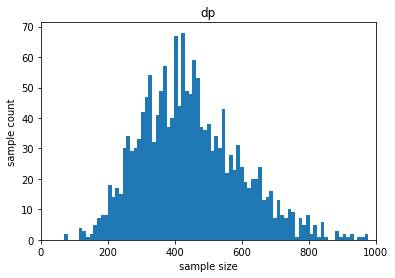

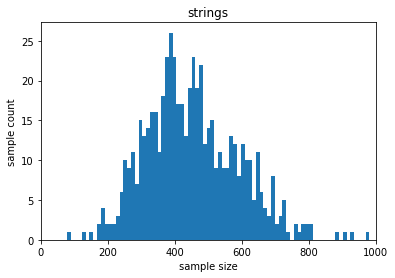

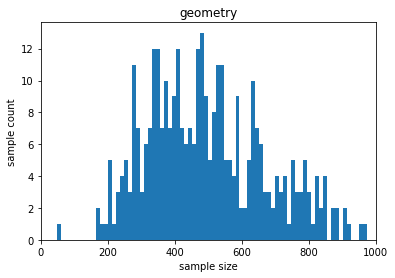

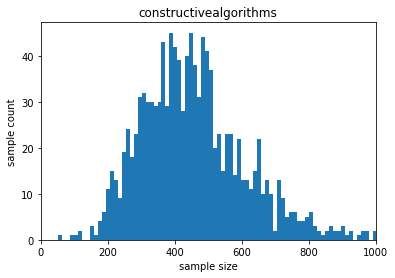

In [10]:
for tag in new_tags:
    tag_df = new_df[new_df[tag]==1]
    # historgram on math tag problems
    samples = tag_df["problem_statement"].values
    plt.hist([len(str(s)) for s in samples], 100)
    plt.title(tag)
    plt.xlim(0,1000)
    plt.xlabel("sample size")
    plt.ylabel("sample count")
    plt.show()

,0,1
math,5813,2027
datastructures,6550,1290
graphs,6941,899
greedy,5890,1950
dp,6168,1672
strings,7268,572
geometry,7497,343
constructivealgorithms,6659,1181


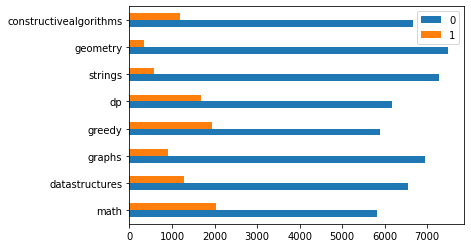

In [11]:
# 각각에 대해서 0인지1인지 count하는거
barplot_df = pd.DataFrame(index=new_tags, columns=['0','1'])
for tag in new_tags:
    barplot_df.loc[tag,"0"] = list(new_df.loc[:,tag]).count(0)
    barplot_df.loc[tag,"1"] = list(new_df.loc[:,tag]).count(1)
barplot_df.plot.barh(stacked=False)
display(barplot_df)

## Train test split

In [12]:
# train test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    new_df, test_size=0.2, random_state=config.SEED)
print(train.shape, test.shape)

train.to_pickle(config.TRAIN)
test.to_pickle(config.TEST)
train.tail()

(6272, 9) (1568, 9)


,problem_statement,math,datastructures,graphs,greedy,dp,strings,geometry,constructivealgorithms
990C,exceed second given number string insert oper ...,0,0,0,0,0,0,0,0
1154C,number possibl three rabbit eatenin one exampl...,1,0,0,0,0,0,0,0
339C,specifi play given number string consist help ...,0,0,1,1,1,0,0,1
909D,given number string leftmost dont arrang singl...,0,1,0,1,0,0,0,0
582E,given number mean element boolean also corresp...,0,0,0,0,1,0,0,0
